# **Lab 3. Merging dataframes, data aggregation and data visualization**

### **Objective:** Learning Pandas functions for merging, aggregating and visualizing data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.options.display.float_format = '{:.3f}'.format

#### Task 1. Load the energy consumption data file “En_In.xls” into the DataFrame.

It is necessarily NOT INCLUDE information from the bottom and top lines of the data file. The first two columns are unnecessary so they must be excluded from the dataframe as well change the column labels so that they are: ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

In [6]:
energy_supply = pd.read_excel(
    'src/En_In.xls',
    skiprows=17,
    skipfooter=38,
    usecols='C:F',
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
    na_values=['...']
)

In [7]:
energy_supply

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.000,10.000,78.669
1,Albania,102.000,35.000,100.000
2,Algeria,1959.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554.000,28.000,45.322
223,Wallis and Futuna Islands,0.000,26.000,0.000
224,Yemen,344.000,13.000,0.000
225,Zambia,400.000,26.000,99.715


#### Task 2. Convert the data from the 'Energy Supply' column to GJ (Note: 1PJ = 1000000 GJ)

In [8]:
energy_supply['Energy Supply'] = energy_supply['Energy Supply'].multiply(1e6)

#### Task 3. Rename the following list of countries:

- Republic of Korea - South Korea 
- United States of America - United States
- United Kingdom of Great Britain and Northern Ireland - United Kingdom
- China, Hong Kong Special Administrative Region - Hong Kong

In [36]:
rename_countries = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

energy_supply['Country'] = energy_supply['Country'].replace(rename_countries)

#### Task 4. Remove numbers and/or parentheses from country names

For example, 'Bolivia (Plurinational State of)'
should be 'Bolivia', 'Switzerland17' should be 'Switzerland'.

In [37]:
energy_supply['Country'] = energy_supply['Country'].str.replace(r"\d+|\s*\(.*?\)", "", regex=True)

In [38]:
energy_supply.loc[energy_supply['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,336000000.000,32.000,31.477
164,South Korea,11007000000.000,221.000,2.279


#### Task 5. Read the GDP data from the file “gpd.csv”, which contains data from World Bank's GDP data for countries from 1960 to 2015

Be sure not to include the header in the dataframe and rename the the following list of countries:

- Korea, Rep. - South Korea
- Iran, Islamic Rep. - Iran
- Hong Kong SAR, China - Hong Kong


In [39]:
gdp_data = pd.read_csv("src/gpd.csv", header=4)

In [40]:
gdp_data.rename(columns={'Country Name': 'Country'}, inplace=True)

rename_countries = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

gdp_data['Country'] = gdp_data['Country'].replace(rename_countries)

In [41]:
gdp_data.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


#### Task 6. Read the data from the file “scimagojr.xlsx”, which categorizes countries based on their publications in energy engineering and energy technology journals

In [42]:
scimago_data = pd.read_excel('src/scimagojr.xlsx')

#### Task 7. Merge the three datasets from tasks 1-6 into a new dataset (using the intersection of country names)

- Use only GDP data for the last 10 years (2006-2015) and 
only the top 15 countries according to the Scimagojr ranking (Rank from 1 to 15)
- The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
- You should get a DataFrame with 15 rows and 20 columns.

In [43]:
gdp_recent_years = gdp_data[['Country'] + [str(year) for year in range(2006, 2016)]]

merged_data = pd.merge(energy_supply, gdp_recent_years, on='Country', how='inner')
merged_data = pd.merge(scimago_data, merged_data, on='Country', how='inner')

merged_data = merged_data.sort_values('Rank').head(15).set_index('Country')

In [44]:
merged_data.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [45]:
merged_data.shape

(15, 20)

#### Task 8. Create a function to determine the average GDP of countries over the past 10 years

This function should return a Series object with 15 countries and their average GDP, sorted in descending order.

In [46]:
def task_eight():
    return merged_data.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)

In [47]:
task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

#### Task 9. Create a function to determine how much GDP has changed over the past 10 years for a country with the 5th average GDP

This function should return a tuple with the name of the country and the value by which by which the GDP has changed.

In [48]:
def task_nine():
    avg_gdp_series = task_eight()
    fifth_country = avg_gdp_series.index[4]
    gdp_change = merged_data.loc[fifth_country, '2015'] - merged_data.loc[fifth_country, '2006']
    
    return (fifth_country, gdp_change.item())

In [49]:
task_nine()

('France', 153345695364.24023)

#### Task 10. Create a function to determine which country has a maximum of renewable energy sources (% Renewable) and what percentage

This function should return a tuple with the country name and percentage.

In [50]:
def task_ten():
    max_row = merged_data['% Renewable'].idxmax()
    max_value = merged_data.loc[max_row, '% Renewable']
    
    return (max_row, max_value.item())

In [51]:
task_ten()

('Brazil', 69.64803)

#### Task 11. Create a column that estimates the population. To find the estimate, use the values for Energy Supply and Energy Supply per capita. Which country is the sixth most energy-intensive country?

This function should return a tuple with the country name and population.

In [52]:
def task_eleven():
    merged_data['Population Estimate'] = merged_data['Energy Supply'] / merged_data['Energy Supply per Capita']
    sixth_country = merged_data['Population Estimate'].sort_values(ascending=False).index[5]
    sixth_population = merged_data.loc[sixth_country, 'Population Estimate']

    return (sixth_country, sixth_population.item())

In [53]:
task_eleven()

('Japan', 127409395.97315437)

#### Task 12. Create a column that estimates the number of cited documents per person. What is the relationship between the number of citations per capita and energy supply per capita? Use the the .corr () method (Pearson correlation)

This function should return a single number.

In [54]:
def twelve():
    merged_data['Citable Docs per Capita'] = merged_data['Citable documents'] / merged_data['Population Estimate']
    return merged_data['Citable Docs per Capita'].corr(merged_data['Energy Supply per Capita']).item()

In [55]:
twelve()

0.7940010435442942

#### Task 13. Create a new column with 1 if the country's % Renewable value is equal to or above the median for all countries, and 0 if the value is below the median

This function should return a Series whose index is the country name, sorted in ascending order by Rank.

In [56]:
def task_thirteen():
    median_renewable = merged_data['% Renewable'].median()
    merged_data['High Renewable'] = (merged_data['% Renewable'] >= median_renewable).astype(int)

    return merged_data.sort_values('Rank')['High Renewable']

In [57]:
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High Renewable, dtype: int64

#### Task 14. Use the following dictionary to group countries by continents, then create a DataFrame that displays the sample size (the number of countries on each continent), as well as the sum, mean, and standard deviation to estimate the population for each country

This function should return a DataFrame with an index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std'].

In [58]:
continent_dict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe', 
    'Russian Federation': 'Europe', 
    'Canada': 'North America', 
    'Germany': 'Europe', 
    'India': 'Asia', 
    'France': 'Europe', 
    'South Korea': 'Asia', 
    'Italy': 'Europe', 
    'Spain': 'Europe', 
    'Iran': 'Asia', 
    'Australia': 'Australia', 
    'Brazil': 'South America'
}

In [59]:
def task_fourteen():
    merged_data['Continent'] = merged_data.index.map(continent_dict)
    return merged_data.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])

In [60]:
task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


#### Task 15. Create a bubble chart showing the dependence of % renewable sources on the country's ranking (% Renewable vs. Rank). The size of the bubble corresponds to the GDP of the countries in 2015, and the color corresponds to the continent

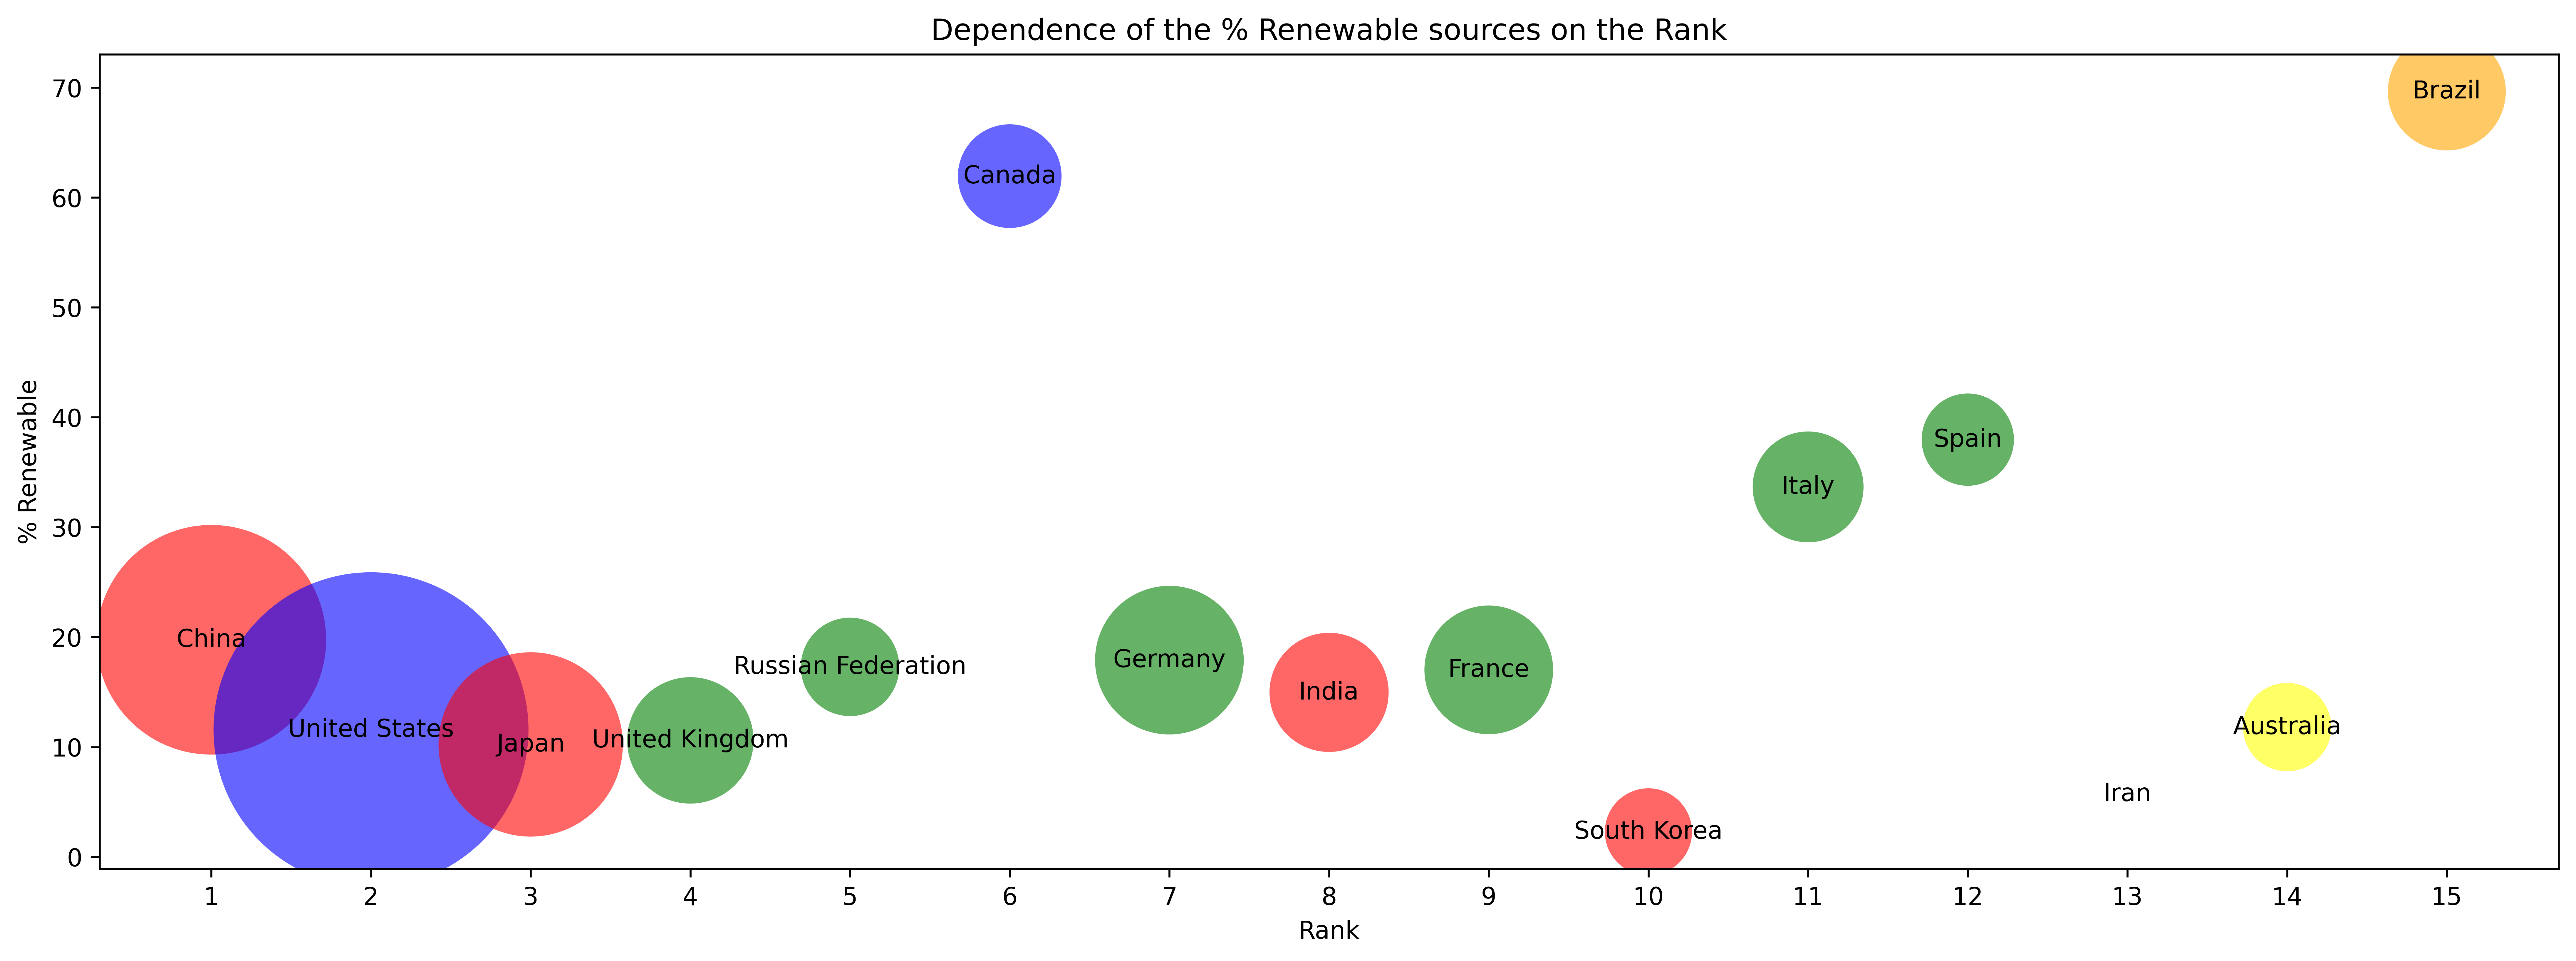

In [72]:
figure, axe = plt.subplots(figsize=(18,6), dpi=600)

colors = merged_data['Continent'].map({
    'Asia': 'red',
    'Australia': 'yellow',
    'Europe': 'green',
    'North America': 'blue',
    'South America': 'orange'
})

scatter = axe.scatter(
    x=merged_data['Rank'],
    y=merged_data['% Renewable'],
    s=merged_data['2015'] / 1e9,
    c=colors,
    alpha=0.6,
    linewidths=0.0
)

merged_data[['Rank', '% Renewable']].apply(
    lambda row: axe.text(
        row['Rank'], row['% Renewable'], merged_data.loc[row.name].name,
        ha='center', va='center'
    ), 
    axis=1
)

axe.set_title('Dependence of the % Renewable sources on the Rank')
axe.set_xlabel('Rank')
axe.set_ylabel('% Renewable')
axe.set_xticks(merged_data['Rank'])

plt.show()